In [3]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [4]:
img = image.load_img("Base data/Training/Happy/download.jpg")

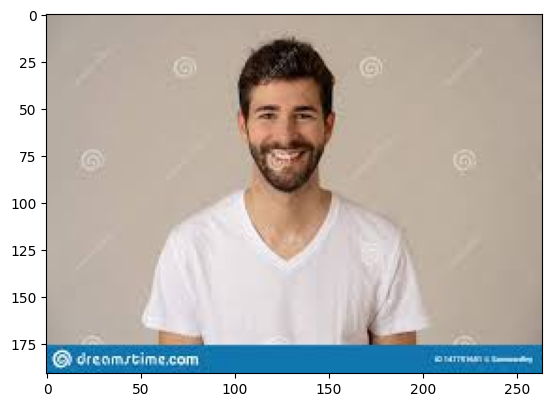

In [5]:
plt.imshow(img)

In [6]:
cv2.imread("Base data/Training/Happy/download.jpg")

array([[[149, 158, 167],
        [149, 158, 167],
        [149, 158, 167],
        ...,
        [141, 151, 161],
        [140, 150, 160],
        [140, 150, 160]],

       [[149, 158, 167],
        [149, 158, 167],
        [150, 159, 168],
        ...,
        [141, 151, 161],
        [141, 151, 161],
        [140, 150, 160]],

       [[149, 158, 167],
        [149, 158, 167],
        [150, 159, 168],
        ...,
        [142, 152, 162],
        [141, 151, 161],
        [141, 151, 161]],

       ...,

       [[168, 107,  11],
        [179, 119,  23],
        [174, 119,  22],
        ...,
        [175, 122,  18],
        [172, 119,  15],
        [168, 116,  10]],

       [[173, 110,  18],
        [184, 123,  27],
        [175, 117,  14],
        ...,
        [171, 119,  13],
        [175, 123,  17],
        [170, 118,  12]],

       [[197, 131,  42],
        [162,  98,   3],
        [169, 112,   3],
        ...,
        [171, 116,  11],
        [169, 117,  11],
        [177, 125,  18]]

In [7]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [8]:
train_dataset = train.flow_from_directory("Base data/Training/",
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')

Found 30 images belonging to 2 classes.


In [9]:
validation_dataset = train.flow_from_directory("Base data/Validation/",
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')

Found 13 images belonging to 2 classes.


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape = (200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(loss = 'binary_crossentropy',
             optimizer = tf.keras.optimizers.RMSprop(lr=0.001),
             metrics=['accuracy'])

In [17]:
model_fit = model.fit(train_dataset ,
                     steps_per_epoch = 3,
                     epochs = 30,
                     validation_data = validation_dataset)

Epoch 1/30
3/3 [==============================] - 2s 457ms/step - loss: 11.3542 - accuracy: 0.6667 - val_loss: 2.5820 - val_accuracy: 0.3846
Epoch 2/30
3/3 [==============================] - 1s 336ms/step - loss: 6.5826e-05 - accuracy: 1.0000 - val_loss: 2.6569 - val_accuracy: 0.3846
Epoch 3/30
3/3 [==============================] - 1s 307ms/step - loss: 3.0108e-04 - accuracy: 1.0000 - val_loss: 2.6253 - val_accuracy: 0.3846
Epoch 4/30
3/3 [==============================] - 1s 298ms/step - loss: 6.8913e-04 - accuracy: 1.0000 - val_loss: 2.9160 - val_accuracy: 0.3846
Epoch 5/30
3/3 [==============================] - 1s 289ms/step - loss: 1.8608e-05 - accuracy: 1.0000 - val_loss: 2.9227 - val_accuracy: 0.3846
Epoch 6/30
3/3 [==============================] - 1s 303ms/step - loss: 7.3066e-05 - accuracy: 1.0000 - val_loss: 3.1762 - val_accuracy: 0.3846
Epoch 7/30
3/3 [==============================] - 1s 292ms/step - loss: 1.7181e-05 - accuracy: 1.0000 - val_loss: 3.1769 - val_accuracy: 0.

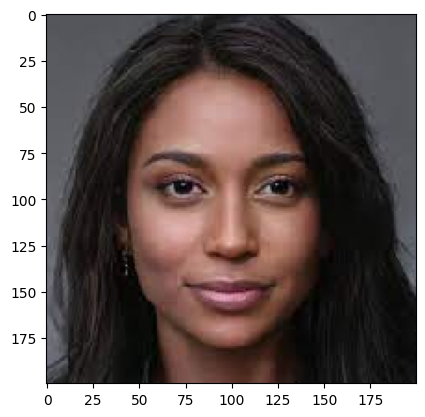

1/1 [==============================] - 0s 128ms/step
Not happy


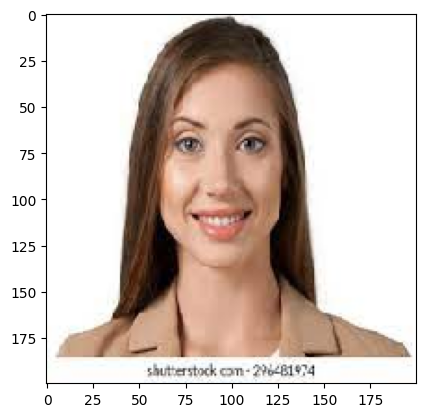

1/1 [==============================] - 0s 43ms/step
happy


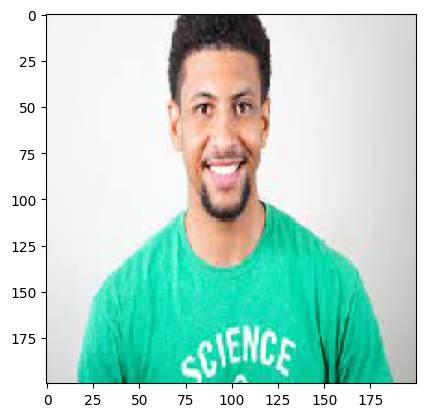

1/1 [==============================] - 0s 42ms/step
happy


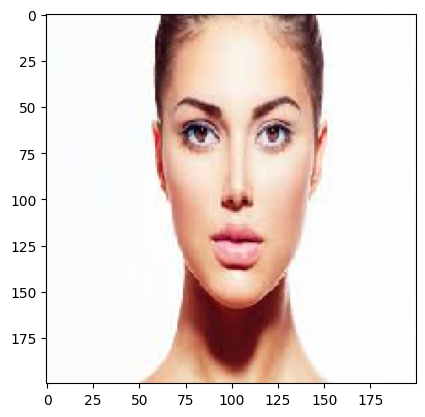

1/1 [==============================] - 0s 49ms/step
happy


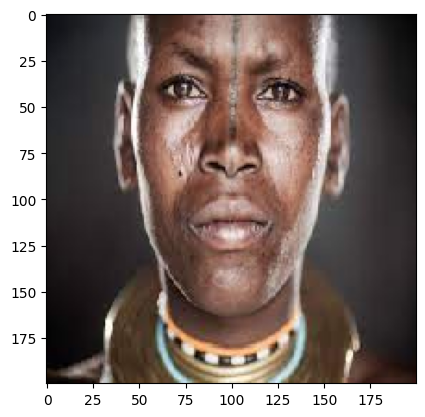

1/1 [==============================] - 0s 48ms/step
Not happy


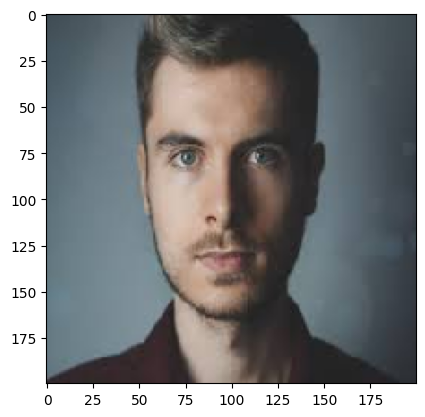

1/1 [==============================] - 0s 43ms/step
happy


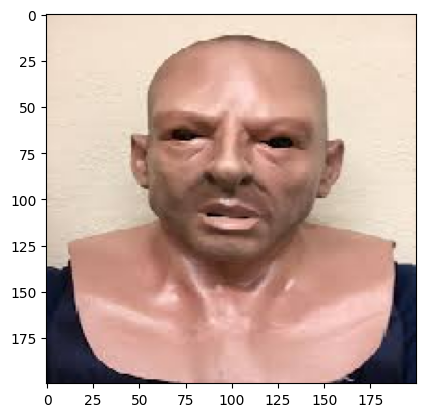

1/1 [==============================] - 0s 45ms/step
happy


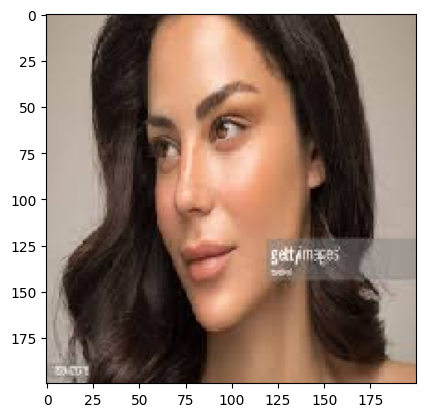

1/1 [==============================] - 0s 58ms/step
Not happy


In [15]:
dir_path = "Base Data/Testing"

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+"/"+i , target_size=(200,200,3))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    
    val = model.predict(images)
    if val == 0:
        print("Not happy")
    else:
        print("happy")

From the above results, the model correctly predicted 6 images out of 8. So the model's accuracy is 6/8 * 100 = 75%